In [0]:
#1.MNIST Classification

1.a)MNIST classification (20 marks): You are provided with code mnist.py that trains a Convolutional Neural Network on MNIST dataset. You are required to modify this file. a) In the file mnist.py identify where the Stochastic Gradient Descent optimizer is created. Train the default CNN architecture by choosing appropriate parameter values for: i) Learning rate – explain what happens when you use too large or too small value and explain why it is happening.

Ans: A learning rate that is too high (e.g. > 0.1) can lead to parameter updates that miss the optimum value, thus never reaching the optimum point. and learning rate that is too low (e.g. < 1e-5) will result in unnecessarily long training time because it takes a lot of time to reach the global minima.This happens beacuse learning rate is multiplied with the gradient of the each  layer in optimisation during SGD,thus this has a direct impact in the accuracy.

Reference:https://becominghuman.ai/learning-rate-and-golf-87c8d4697e31

ii) Weight decay – explain what happens when you use too large or too small regularization and explain why it is happening.

Ans:The reason to choose this optimal value is because if you have too much weight decay, then no matter how much you train, the model never quite fits well enough whereas if you have too little weight decay, you can still train well, but it has to stopped a little well before.This is because we are tryong to penalize the weights in L2 level,making the weights less than the original value thus choosing it in optimal range is necessary.

Refence:https://becominghuman.ai/this-thing-called-weight-decay-a7cd4bcfccab


Test set: Average loss: 3.1306, Accuracy: 1257/10000 (13%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 3.023972
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.674255
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.512259
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.317042
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.347073
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.205698
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.343414
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.177113
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.325826
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.082530
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.104205
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.143132
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.059474
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.156957
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.158325
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.060198
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.331438
Train Epoch: 1 [21760/60000 (36%)]	Loss: 0.018328
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.141398
Train

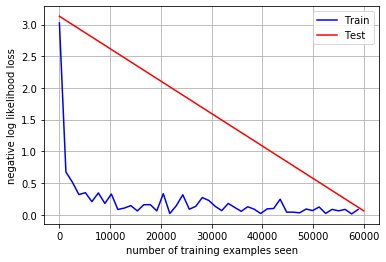

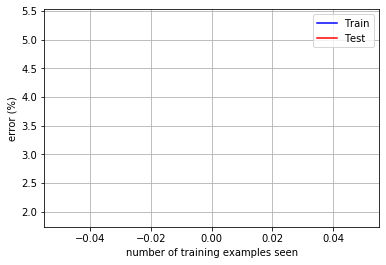

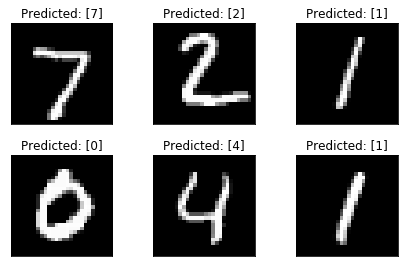

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Training hyperparameters
epochs = 1
batch_size = 64
learning_rate = 0.004
momentum = 0.9
weight_decay = 0.0001
log_interval = 20

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, 
                               kernel_size=5, stride=1, padding=0)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, 
                               kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=800, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 800)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=24, out_channels=64, 
                               kernel_size=3, stride=1, padding=2)
        self.fc1 = nn.Linear(in_features=1200, out_features=196)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        # TODO        

    def forward(self, x):
        # TODO
        return F.log_softmax(x, dim=1)

def plot_data(data, label, text):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title(text + ": {}".format(label[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
	
def predict_batch(model, device, test_loader):
    examples = enumerate(test_loader)
    model.eval()
    with torch.no_grad():
        batch_idx, (data, target) = next(examples)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.cpu().data.max(1, keepdim=True)[1] # get the index of the max log-probability
        pred = pred.numpy()
    return data.cpu().data.numpy(), target.cpu().data.numpy(), pred

def plot_graph(train_x, train_y, test_x, test_y, ylabel=''):
    fig = plt.figure()
    plt.plot(train_x, train_y, color='blue')
    plt.plot(test_x, test_y, color='red')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def train(model, device, train_loader, optimizer, epoch, losses=[], counter=[], errors=[]):
    model.train()
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
            counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
    errors.append(100. * (1 - correct / len(train_loader.dataset)))

def test(model, device, test_loader, losses=[], errors=[]):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    losses.append(test_loss)
    errors.append(100. *  (1 - correct / len(test_loader.dataset)))
  
def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # data transformation
    train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
    test_data = datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)

	# extract and plot random samples of data
    #examples = enumerate(test_loader)
    #batch_idx, (data, target) = next(examples)
    #plot_data(data, target, 'Ground truth')
	
    # model creation
    model = CNN().to(device)
    # optimizer creation
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)

    # lists for saving history
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    train_errors = []
    test_errors = []
    error_counter = [i*len(train_loader.dataset) for i in range(epochs)]

    # test of randomly initialized model
    test(model, device, test_loader, losses=test_losses)

    # global training and testing loop
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
        test(model, device, test_loader, losses=test_losses, errors=test_errors)
		
    # plotting training history
    plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
    plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
	
    # extract and plot random samples of data with predicted labels
    data, _, pred = predict_batch(model, device, test_loader)
    plot_data(data, pred, 'Predicted')
	
if __name__ == '__main__':
    main()


1.b Correct the mistakes in CNN2 and train it on MNIST train set. Desired architecture of CNN2 is displayed on following diagam:


Test set: Average loss: 3.5844, Accuracy: 825/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 3.829230
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.757338
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.344140
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.349332
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.230367
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.158959
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.218982
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.219718
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.084556
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.153517
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.155192
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.082809
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.058362
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.077364
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.212848
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.089929
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.164787
Train Epoch: 1 [21760/60000 (36%)]	Loss: 0.092620
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.178426
Train E

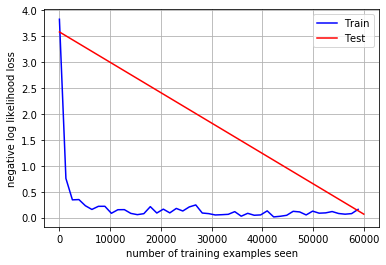

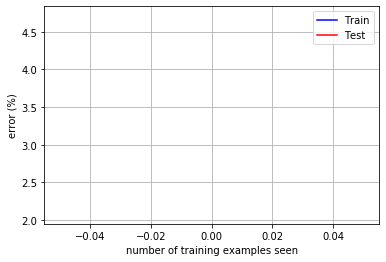

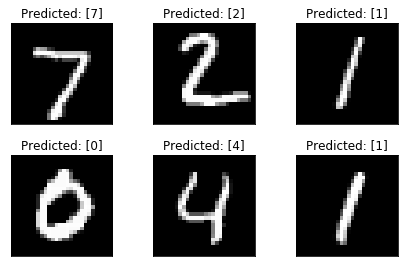

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Training hyperparameters
epochs = 1
batch_size = 64
learning_rate = 0.004
momentum = 0.9
weight_decay = 0.01
log_interval = 20

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, 
                               kernel_size=5, stride=1, padding=0)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, 
                               kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=800, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 800)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(in_features=3136, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


     
class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        # TODO        

    def forward(self, x):
        # TODO
        return F.log_softmax(x, dim=1)

def plot_data(data, label, text):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title(text + ": {}".format(label[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
	
def predict_batch(model, device, test_loader):
    examples = enumerate(test_loader)
    model.eval()
    with torch.no_grad():
        batch_idx, (data, target) = next(examples)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.cpu().data.max(1, keepdim=True)[1] # get the index of the max log-probability
        pred = pred.numpy()
    return data.cpu().data.numpy(), target.cpu().data.numpy(), pred

def plot_graph(train_x, train_y, test_x, test_y, ylabel=''):
    fig = plt.figure()
    plt.plot(train_x, train_y, color='blue')
    plt.plot(test_x, test_y, color='red')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def train(model, device, train_loader, optimizer, epoch, losses=[], counter=[], errors=[]):
    model.train()
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
            counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
    errors.append(100. * (1 - correct / len(train_loader.dataset)))

def test(model, device, test_loader, losses=[], errors=[]):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    losses.append(test_loss)
    errors.append(100. *  (1 - correct / len(test_loader.dataset)))
  
def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # data transformation
    train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
    test_data = datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)

	# extract and plot random samples of data
    #examples = enumerate(test_loader)
    #batch_idx, (data, target) = next(examples)
    #plot_data(data, target, 'Ground truth')
	
    # model creation
    model = CNN2().to(device)
    # optimizer creation
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)

    # lists for saving history
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    train_errors = []
    test_errors = []
    error_counter = [i*len(train_loader.dataset) for i in range(epochs)]

    # test of randomly initialized model
    test(model, device, test_loader, losses=test_losses)

    # global training and testing loop
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
        test(model, device, test_loader, losses=test_losses, errors=test_errors)
		
    # plotting training history
    plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
    plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
	
    # extract and plot random samples of data with predicted labels
    data, _, pred = predict_batch(model, device, test_loader)
    plot_data(data, pred, 'Predicted')
	
if __name__ == '__main__':
    main()


**1.c ) ** Change dataset to fashion MNIST (https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/, hint: take a look at torchvision.datasets), estimate the dataset mean and standard deviation and use it to normalize the data in the data loader.

Mean of Fashion MNIST Dataset:0.2860.
Standard Deviation of MNIST Dataset:0.3530.

This is run with CNN2 model.




cpu
Mean of MNIST_Fashion Dataset tensor(0.2860)
Standard Deivation of MNIST_Fashion Dataset tensor(0.3530)

Test set: Average loss: 3.3244, Accuracy: 795/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 3.521910
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.983659
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.820742
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.636876
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.540689
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.483057
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.431911
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.749912
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.588768
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.461984
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.577549
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.554450
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.386777
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.450935
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.463259
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.426623
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.478793

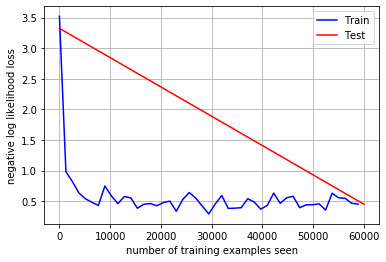

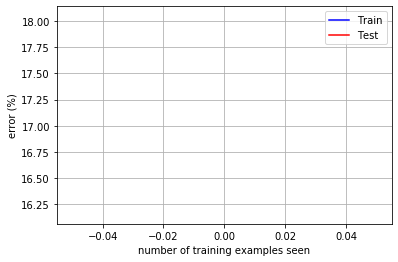

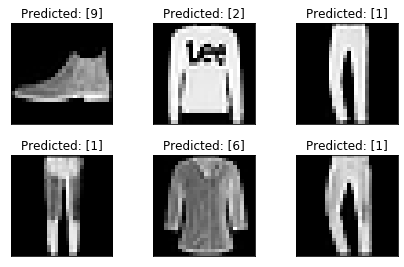

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.modules as M
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd

# Training hyperparameters
epochs = 1
batch_size = 64
learning_rate = 0.004 # TODO
momentum = 0.9
weight_decay = 0.03 # TODO
log_interval = 20
 
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, 
                               kernel_size=5, stride=1, padding=0)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, 
                               kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=800, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 800)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(in_features=3136, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN3(nn.Module):
     def __init__(self,p=0.0):
        super(CNN3, self).__init__()
        self.p = p
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=3, stride=1, padding=1)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, 
                               kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(in_features=3136, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)
        #self.fc3 = nn.Linear(in_features=256, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        #nn.init.kaiming_normal_(self.conv3.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')
        #nn.init.kaiming_normal_(self.fc3.weight, nonlinearity='linear')

     def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = nn.functional.dropout(x, p=self.p, training=True)
        x = self.conv2(x)
        #x = nn.functional.dropout(x, p=self.p, training=True)
        x = F.relu(x)
        x = self.maxpool(x)
        #x = self.conv3(x)
        #x = nn.functional.dropout(x, p=self.p, training=True)
        #x = F.relu(x)
        #x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        #x = self.fc3(x)

        return F.log_softmax(x, dim=1)     
    


def plot_data(data, label, text):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title(text + ": {}".format(label[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
	
def predict_batch(model, device, test_loader):
    examples = enumerate(test_loader)
    model.eval()
    with torch.no_grad():
        batch_idx, (data, target) = next(examples)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.cpu().data.max(1, keepdim=True)[1] # get the index of the max log-probability
        pred = pred.numpy()
    return data.cpu().data.numpy(), target.cpu().data.numpy(), pred

def plot_graph(train_x, train_y, test_x, test_y, ylabel=''):
    fig = plt.figure()
    plt.plot(train_x, train_y, color='blue')
    plt.plot(test_x, test_y, color='red')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def train(model, device, train_loader, optimizer, epoch, losses=[], counter=[], errors=[]):
    model.train()
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
            counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
    errors.append(100. * (1 - correct / len(train_loader.dataset)))

def test(model, device, test_loader, losses=[], errors=[]):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    losses.append(test_loss)
    errors.append(100. *  (1 - correct / len(test_loader.dataset)))
  
def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    print(device)

    # data transformation
   
    
    train_fashion_data = datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.2860,), (0.3530,))
                   ]))

    test_fashion_data = datasets.FashionMNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.2860,), (0.3530,))
                   ]))
    
    #Mean and Standard Deviation for MNIST_Fashion
    print("Mean of MNIST_Fashion Dataset",train_fashion_data.data.float().mean()/255)
    print("Standard Deivation of MNIST_Fashion Dataset",train_fashion_data.data.float().std()/255)

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    #train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    train_loader = torch.utils.data.DataLoader(train_fashion_data, batch_size=batch_size, shuffle=True, **kwargs)
    #test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_fashion_data, batch_size=batch_size, shuffle=False, **kwargs)

	# extract and plot random samples of data
    #examples = enumerate(test_loader)
    #batch_idx, (data, target) = next(examples)
    #plot_data(data, target, 'Ground truth')
	
    # model creation
    model = CNN2().to(device)
    # optimizer creation
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)

    # lists for saving history
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    train_errors = []
    test_errors = []
    error_counter = [i*len(train_loader.dataset) for i in range(epochs)]

    # test of randomly initialized model
    test(model, device, test_loader, losses=test_losses) 

    # global training and testing loop
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
        test(model, device, test_loader, losses=test_losses, errors=test_errors)
		
    # plotting training history
    plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
    plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
	
    # extract and plot random samples of data with predicted labels
    data, _, pred = predict_batch(model, device, test_loader)
    plot_data(data, pred, 'Predicted')
    
   
	
if __name__ == '__main__':
    main()


1.d Design CNN3 with additional regularization of your choosing. Explain benefits of such regularization and report its accurracy on fashion MNIST and its relative improvement over CNN2.

Added batch normalization after the two convolution layers.This increased the accuracy by 4% from CNN2.This  make sures that the each layer to have inputs with zero mean and unit varience ,thus making the inputs to all the layers to be more accurate and thus increaing the accuracy.

Reference:https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html


cpu
Mean of MNIST_Fashion Dataset tensor(0.2860)
Standard Deivation of MNIST_Fashion Dataset tensor(0.3530)


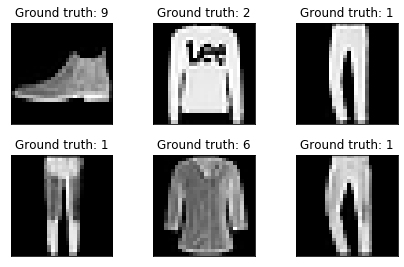


Test set: Average loss: 2.7257, Accuracy: 1660/10000 (17%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.718514
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.768469
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.667444
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.601301
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.369590
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.585000
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.360884
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.473521
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.423767
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.374041
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.292547
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.371948
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.404418
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.238615
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.282078
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.348872
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.346498
Train Epoch: 1 [21760/60000 (36%)]	Loss: 0.280203
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.463739
Train

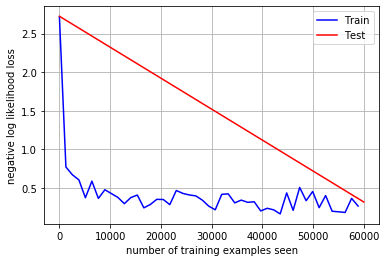

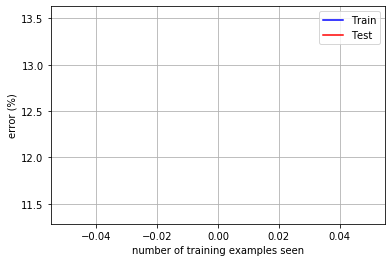

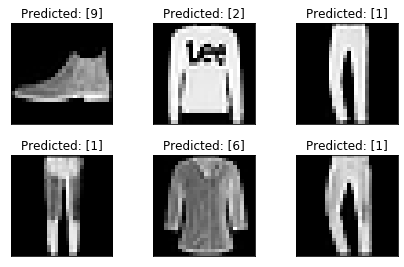

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.modules as M
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd

# Training hyperparameters
epochs = 1
batch_size = 64
learning_rate = 0 # TODO
momentum = 0.9
weight_decay = 0 # TODO
log_interval = 20
 
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, 
                               kernel_size=5, stride=1, padding=0)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, 
                               kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=800, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 800)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(in_features=3136, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN3(nn.Module):
     def __init__(self,p=0.0):
        super(CNN3, self).__init__()
        self.p = p
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=5, stride=1, padding=2)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(in_features=3136, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)
       

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')
       

     def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.batchnorm1(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.batchnorm2(x)
        x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
      

        return F.log_softmax(x, dim=1)     
    


def plot_data(data, label, text):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title(text + ": {}".format(label[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
	
def predict_batch(model, device, test_loader):
    examples = enumerate(test_loader)
    model.eval()
    with torch.no_grad():
        batch_idx, (data, target) = next(examples)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.cpu().data.max(1, keepdim=True)[1] # get the index of the max log-probability
        pred = pred.numpy()
    return data.cpu().data.numpy(), target.cpu().data.numpy(), pred

def plot_graph(train_x, train_y, test_x, test_y, ylabel=''):
    fig = plt.figure()
    plt.plot(train_x, train_y, color='blue')
    plt.plot(test_x, test_y, color='red')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def train(model, device, train_loader, optimizer, epoch, losses=[], counter=[], errors=[]):
    model.train()
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
            counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
    errors.append(100. * (1 - correct / len(train_loader.dataset)))

def test(model, device, test_loader, losses=[], errors=[]):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    losses.append(test_loss)
    errors.append(100. *  (1 - correct / len(test_loader.dataset)))
  
def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    print(device)

    # data transformation
    train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
    
    train_fashion_data = datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.2860,), (0.3530,))
                   ]))
    test_data = datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
    test_fashion_data = datasets.FashionMNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.2860,), (0.3530,))
                   ]))
    
    #Mean and Standard Deviation for MNIST_Fashion
    print("Mean of MNIST_Fashion Dataset",train_fashion_data.data.float().mean()/255)
    print("Standard Deivation of MNIST_Fashion Dataset",train_fashion_data.data.float().std()/255)

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    #train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    train_loader = torch.utils.data.DataLoader(train_fashion_data, batch_size=batch_size, shuffle=True, **kwargs)
    #test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_fashion_data, batch_size=batch_size, shuffle=False, **kwargs)

	# extract and plot random samples of data
    examples = enumerate(test_loader)
    batch_idx, (data, target) = next(examples)
    plot_data(data, target, 'Ground truth')
	
    # model creation
    model = CNN3().to(device)
    # optimizer creation
    optimizer = optim.SGD(model.parameters(), lr=0.004, momentum=momentum, weight_decay=0.01)

    # lists for saving history
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    train_errors = []
    test_errors = []
    error_counter = [i*len(train_loader.dataset) for i in range(epochs)]

    # test of randomly initialized model
    test(model, device, test_loader, losses=test_losses) 

    # global training and testing loop
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
        test(model, device, test_loader, losses=test_losses, errors=test_errors)
		
    # plotting training history
    plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
    plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
	
    # extract and plot random samples of data with predicted labels
    data, _, pred = predict_batch(model, device, test_loader)
    plot_data(data, pred, 'Predicted')
    
   
	
if __name__ == '__main__':
    main()


In [0]:
#1.e Download file YourEmail_in.csv from the course drive. File contains 5x5 array of integers X. Manualy compute valid convolution

In [0]:
import pandas as pd
import numpy as np
def calc_convolution():
    from numpy import genfromtxt
    my_data = genfromtxt('RAMASUBA@TCD.IE_in.csv', delimiter=',')
    print(my_data)
    w=np.array([-1,0,-1,0,0,0,1,0,1])
    w=w.reshape(3,3)
    length=len(w)
    print(w)
    print(length)
    len_data=len(my_data)
    first=0
    end=3
    result=[]
    for i in range(0,length,1):
        inside=[]
        for j in range(0,length,1):
            inside.append(np.sum(my_data[(i+first) : (i+end), (j+first): (j+end)] * (w)))     
        result.append(inside)
    res=(np.array(result))
    print(res)
    np.savetxt('RAMASUBA@TCD.IE_out.csv',res,delimiter=',')

    
calc_convolution()

[[176. 191. 168. 176. 216.]
 [  7.  58.  26. 108. 218.]
 [ 82.  88.  96.  32. 131.]
 [ 21.  93.  62. 242. 205.]
 [152. 254. 139. 146. 130.]]
[[-1  0 -1]
 [ 0  0  0]
 [ 1  0  1]]
3
[[-166. -247. -157.]
 [  50.  169.   23.]
 [ 113.  280.   42.]]
